# Hudson Arney
## Pipeline In Class Activity w/ Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_curve, auc, RocCurveDisplay

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X = df[["Pclass", "Age", "Fare"]]
y = df["Survived"]

In [5]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
pipe = Pipeline([('imputer', SimpleImputer()),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(penalty=None))])

In [8]:
params = {'imputer__strategy':['mean', 'median', 'most_frequent']}

In [9]:
np.random.seed(42)
grid = GridSearchCV(pipe, params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(penalty=None))]),
             param_grid={'imputer__strategy': ['mean', 'median',
                                               'most_frequent']})

In [10]:
print("Best Hyper Parameter: ", grid.best_params_)

Best Hyper Parameter:  {'imputer__strategy': 'mean'}


In [11]:
print("Best Hyper Parameter Accuracy: ", grid.best_score_)

Best Hyper Parameter Accuracy:  0.6934193548387096


In [12]:
final_pipe = Pipeline([('imputer', SimpleImputer()),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(penalty=None))])

In [13]:
np.random.seed(42)
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LogisticRegression(penalty=None))])

In [14]:
scores = final_pipe.predict_proba(X_test)
tpr, fpr, threshold = roc_curve(y_test, scores[:,0])

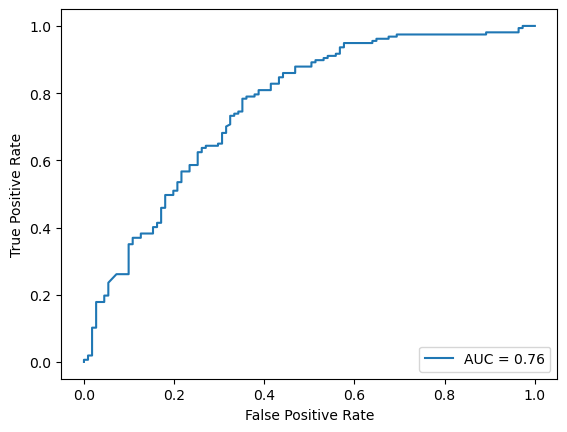

In [15]:
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
disp.plot()

### PART 2

In [16]:
part2_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [17]:
param_grid = {
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'poly__degree': [2, 3, 4]
}

In [18]:
np.random.seed(42)
part2_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('poly', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [19]:
grid_search = GridSearchCV(part2_pipe, param_grid, cv=5)

In [20]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('poly', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'imputer__strategy': ['mean', 'median',
                                               'most_frequent'],
                         'poly__degree': [2, 3, 4]})

In [21]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'imputer__strategy': 'median', 'poly__degree': 3}


In [22]:
accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7425373134328358


In [23]:
scores = part2_pipe.predict_proba(X_test)
tpr, fpr, threshold = roc_curve(y_test, scores[:,0])

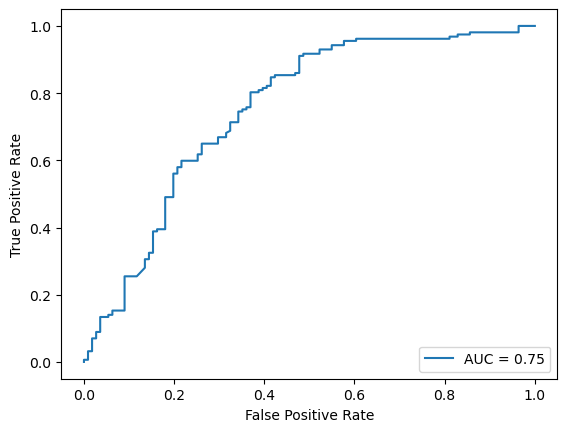

In [24]:
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
disp.plot()